In [428]:
import pandas as pd


In [429]:
df = pd.read_csv('../data/validated.csv')

# validation

In [430]:
df.dropna(inplace=True)

# drop location column because it is not needed for the model
df.drop(['location'], axis=1, inplace=True)

# change header name
df.rename(
    columns={
        'Admin 2 Level (City/County/Borough/Region)':'City/County/Borough/Region'
    },
    inplace=True
)

# convert datatype 
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(
    by=[
        'Province/State',
        'City/County/Borough/Region',
        'Total Death', 'Total Confirmed'
    ],
    inplace=True
)

df.drop_duplicates(
    subset=[
        'Province/State',
        'City/County/Borough/Region'
    ],
    keep='last',
    inplace=True
)



In [431]:

# Drop the data that City/County/Borough/Region startswith 'out of'
df = df[~df['City/County/Borough/Region'].str.startswith('Out of')]

# Skim the data

In [432]:
df.shape

(3232, 5)

In [433]:
# select Province/State is Alabama, City/County/Borough/Region is Autauga as an example
sample = df[(df['Province/State'] == 'Alabama') & (df['City/County/Borough/Region'] == 'Autauga')]

In [434]:
sample['Total Death'].max()

222

In [435]:
sample['Total Confirmed'].max()

17864

In [436]:
# Sort the data by total death and total confirmed
df.sort_values(
    by=[
        'Province/State',
        'Total Death', 'Total Confirmed'
    ],
    inplace=True
)

df['Death Rate'] = df['Total Death'] / df['Total Confirmed']

# Data Visualization (Skim)

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232 entries, 2720994 to 2720758
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Province/State              3232 non-null   object        
 1   City/County/Borough/Region  3232 non-null   object        
 2   Date                        3232 non-null   datetime64[ns]
 3   Total Death                 3232 non-null   int64         
 4   Total Confirmed             3232 non-null   int64         
 5   Death Rate                  3216 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 176.8+ KB


In [438]:
df['Death Rate'].describe()

count    3216.000000
mean        0.014329
std         0.007575
min         0.000000
25%         0.009995
50%         0.013514
75%         0.017701
max         0.108322
Name: Death Rate, dtype: float64

<Axes: >

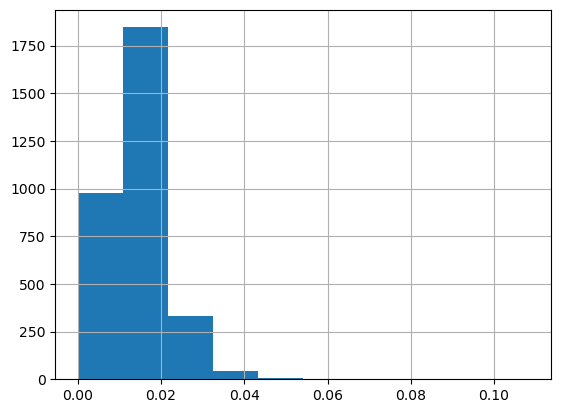

In [439]:
df['Death Rate'].hist()

<Axes: >

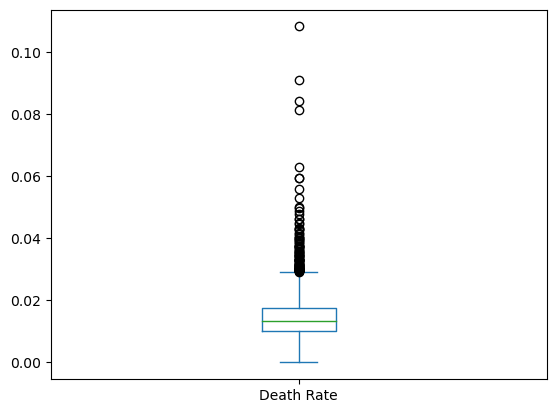

In [440]:
df['Death Rate'].plot(kind='box')

<Axes: ylabel='Density'>

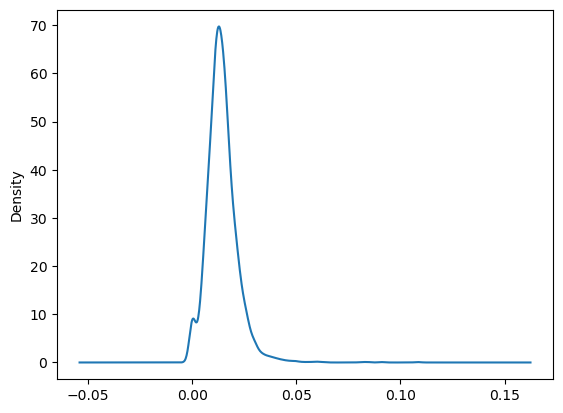

In [441]:
df['Death Rate'].plot(kind='density')

In [443]:
df.to_csv('../data/data.csv', index=False)